# Data Preparation

## 1. Feature Selection
### 1.1 Selecting, Cleaning and Scaling Features
Disease: ARTHSPIN(Arthropathies)#3/ (dataset too small)METAB3(Metabolic)#2

CharlsonIndex: Severity

Cluster based on members=>Remove outlier if use k-means

First Clustering: Age, #claims(Frequency), LOS(Duration)=>Dummy var for norminal to calculate distance

Based on the first clustering: DrugCount, LabCount

In [1]:
claims <- read.csv(file="Claims.csv")
members <- read.csv(file="Members.csv")
drugs <- read.csv(file="DrugCount.csv")
labs <- read.csv(file="LabCount.csv")

### Cleaning

In [119]:
# filter Y1 data
claimsY1 <- claims[claims$Year == "Y1",]
# claimsY1 <- claimsY1[which(claimsY1$PrimaryConditionGroup=="PRGNCY"&claimsY1$CharlsonIndex==0),]
# AMI
claimsY1 <- claimsY1[which(claimsY1$PrimaryConditionGroup=="ROAMI"&claimsY1$CharlsonIndex==0),]
drugsY1 <- drugs[drugs$Year == "Y1",]
labsY1 <- labs[labs$Year == "Y1",]
membersY1 <- members
summary(claimsY1)
# nrow(distinct(claimsY1, MemberID))

    MemberID          ProviderID          Vendor            PCP       
 Min.   :   32491   Min.   :   6401   Min.   :  1066   Min.   :  594  
 1st Qu.:25304044   1st Qu.:2659777   1st Qu.:179509   1st Qu.:27467  
 Median :50136220   Median :5145548   Median :306649   Median :51763  
 Mean   :50163628   Mean   :5132656   Mean   :404887   Mean   :52643  
 3rd Qu.:75153086   3rd Qu.:7526359   3rd Qu.:576600   3rd Qu.:77134  
 Max.   :99998627   Max.   :9997391   Max.   :999364   Max.   :99649  
                    NA's   :115       NA's   :214      NA's   :28     
 Year                   Specialty                   PlaceSvc       PayDelay   
 Y1:8473   Internal          :3297   Office             :4426   162+   : 596  
 Y2:   0   Diagnostic Imaging:2009   Urgent Care        :2280   35     : 268  
 Y3:   0   General Practice  :1396   Inpatient Hospital :1161   30     : 246  
           Emergency         :1268   Outpatient Hospital: 397   28     : 232  
           Surgery           : 225   

In [120]:
# MEMBERS
# add number of claims
n_claims <- table(claimsY1$MemberID)

membersY1 <- merge(membersY1, data.frame(MemberID=names(n_claims),
  claims=as.numeric(n_claims)))

# translate age
# levels(membersY1$AgeAtFirstClaim) 
age <- gsub("(\\d+).*", "\\1", levels(membersY1$AgeAtFirstClaim))
levels(membersY1$AgeAtFirstClaim) <- age
membersY1$AgeAtFirstClaim <- as.numeric(as.character(membersY1$AgeAtFirstClaim))
membersY1<-na.omit(membersY1)
# generate random numbers between ranges
# summary(membersY1)
for(i in 1:nrow(membersY1)){
  if(membersY1$AgeAtFirstClaim[i]==0){membersY1$AgeAtFirstClaim[i]<-sample(0:9, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==10){membersY1$AgeAtFirstClaim[i]<-sample(10:19, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==20){membersY1$AgeAtFirstClaim[i]<-sample(20:29, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==30){membersY1$AgeAtFirstClaim[i]<-sample(30:39, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==40){membersY1$AgeAtFirstClaim[i]<-sample(40:49, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==50){membersY1$AgeAtFirstClaim[i]<-sample(50:59, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==60){membersY1$AgeAtFirstClaim[i]<-sample(60:69, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==70){membersY1$AgeAtFirstClaim[i]<-sample(70:79, 1, replace = TRUE)}
  else if(membersY1$AgeAtFirstClaim[i]==80){membersY1$AgeAtFirstClaim[i]<-sample(80:89, 1, replace = TRUE)}
}
#  jiter     
# summary(membersY1)

#CharlsonIndex

#DRUG CLAIM
n_dclaims <- table(drugsY1$MemberID)
membersY1 <- merge(membersY1, data.frame(MemberID=names(n_dclaims),
  dclaims=as.numeric(n_dclaims)))   


#DRUG
levels(drugsY1$DrugCount) <- c(1,2,3,4,5,6,7)
drugsY1$DrugCount <- as.numeric(as.character(drugsY1$DrugCount))
drugsY1$MemberID <- as.factor(drugsY1$MemberID)
drugsY1 <- aggregate(DrugCount~MemberID, drugsY1, sum)
membersY1 <- merge(membersY1,data.frame(MemberID = drugsY1$MemberID,DrugCount = as.numeric(drugsY1$DrugCount)))
# summary(membersY1)

#LAB
levels(labsY1$LabCount) <- c(1,10,2,3,4,5,6,7,8,9)
labsY1$LabCount <- as.numeric(as.character(labsY1$LabCount))
labsY1$MemberID <- as.factor(labsY1$MemberID)
labsY1 <- aggregate(LabCount~MemberID, labsY1, sum)
membersY1 <- merge(membersY1,data.frame(MemberID = labsY1$MemberID,LabCount = as.numeric(labsY1$LabCount)))
# summary(membersY1)

#Average Drug&Lab Count

# CLAIMS
# translate Charlson Index
# levels(claimsY1$CharlsonIndex)
levels(claimsY1$CharlsonIndex) <- c(0, 1.5, 3.5, 5)
claimsY1$CharlsonIndex <- as.numeric(as.character(claimsY1$CharlsonIndex))

#translate LOS
# levels(claimsY1$LengthOfStay)
levels(claimsY1$LengthOfStay) <- c(0, 1, 11, 2, 21, 112, 3, 4, 42, 5, 6)
claimsY1$LengthOfStay <- as.numeric(as.character(claimsY1$LengthOfStay))

summary(membersY1)
# summary(claimsY1)
#length(claimsY1$LengthOfStay[claimsY1$LengthOfStay!=0])


    MemberID        AgeAtFirstClaim Sex         claims          dclaims      
 Min.   :   32491   Min.   : 0.00    :608   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:26914132   1st Qu.:49.00   F:884   1st Qu.: 1.000   1st Qu.: 3.500  
 Median :52305981   Median :66.00   M:611   Median : 1.000   Median : 7.000  
 Mean   :51275442   Mean   :61.75           Mean   : 2.302   Mean   : 6.708  
 3rd Qu.:76167596   3rd Qu.:76.00           3rd Qu.: 3.000   3rd Qu.:10.000  
 Max.   :99998627   Max.   :89.00           Max.   :26.000   Max.   :12.000  
   DrugCount        LabCount     
 Min.   : 1.00   Min.   : 1.000  
 1st Qu.: 6.00   1st Qu.: 5.000  
 Median :14.00   Median : 9.000  
 Mean   :18.29   Mean   : 9.814  
 3rd Qu.:26.00   3rd Qu.:13.000  
 Max.   :84.00   Max.   :65.000  

### Selecting

In [121]:
# Arthropathies subset may contain duplicate members
# focus on claims with LOS, removed LOS = 0

# arthset <- claimsY1[which(claimsY1$PrimaryConditionGroup == "ARTHSPIN"),]
arthset <- claimsY1
arthset <- data.frame(MemberID = arthset$MemberID, LengthOfStay = arthset$LengthOfStay, CharlsonIndex = arthset$CharlsonIndex)
# arthset <- arthset[which(arthset$LengthOfStay != 0),]
# nrow(metaset)
# nrow(membersY1)
arthset$MemberID <- as.factor(arthset$MemberID)
arthset <- merge(arthset, membersY1, by = "MemberID")
# nrow(metaset)
arthset <- na.omit(arthset)
summary(arthset)
nrow(arthset)

     MemberID     LengthOfStay     CharlsonIndex AgeAtFirstClaim Sex     
 39116641:  26   Min.   :0.00000   Min.   :0     Min.   : 0.00    :1507  
 76550927:  15   1st Qu.:0.00000   1st Qu.:0     1st Qu.:48.00   F:1920  
 49766383:  14   Median :0.00000   Median :0     Median :65.00   M:1414  
 89999560:  14   Mean   :0.05433   Mean   :0     Mean   :61.26           
 2475559 :  13   3rd Qu.:0.00000   3rd Qu.:0     3rd Qu.:75.00           
 2816931 :  13   Max.   :4.00000   Max.   :0     Max.   :89.00           
 (Other) :4746                                                           
     claims         dclaims         DrugCount        LabCount     
 Min.   : 1.00   Min.   : 1.000   Min.   : 1.00   Min.   : 1.000  
 1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.: 6.00   1st Qu.: 5.000  
 Median : 3.00   Median : 7.000   Median :14.00   Median : 9.000  
 Mean   : 4.12   Mean   : 6.707   Mean   :18.08   Mean   : 9.909  
 3rd Qu.: 6.00   3rd Qu.:10.000   3rd Qu.:26.00   3rd Qu.:13.000  
 Max. 

[1] 4841

### Scaling

In [122]:
# arthset <- data.frame(LengthOfStay = arthset$LengthOfStay, CharlsonIndex = arthset$CharlsonIndex, Nclaims = arthset$claims)
# arthset <- arthset[sample(nrow(arthset), 8000), ]
arth <- data.frame(AgeAtFirstClaim = arthset$AgeAtFirstClaim, DrugCount = arthset$DrugCount)
labset <- data.frame(NDclaims = arthset$dclaims, LabCount = arthset$LabCount)

arthset_scaled <- scale(arth)
labset_scaled <- scale(labset) 
summary(arthset_scaled)
summary(labset_scaled)

# plot(arthset_scaled)
# plot(data.frame(apply(labset_scaled,2,jitter)))
# plot(labset_scaled)


 AgeAtFirstClaim     DrugCount      
 Min.   :-3.5335   Min.   :-1.0840  
 1st Qu.:-0.7649   1st Qu.:-0.7666  
 Median : 0.2157   Median :-0.2588  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.7925   3rd Qu.: 0.5029  
 Max.   : 1.6000   Max.   : 4.1845  

    NDclaims           LabCount      
 Min.   :-1.57947   Min.   :-1.3887  
 1st Qu.:-1.02592   1st Qu.:-0.7652  
 Median : 0.08119   Median :-0.1417  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.91151   3rd Qu.: 0.4818  
 Max.   : 1.46506   Max.   : 8.5876  

### 1.2 Remove Outliers

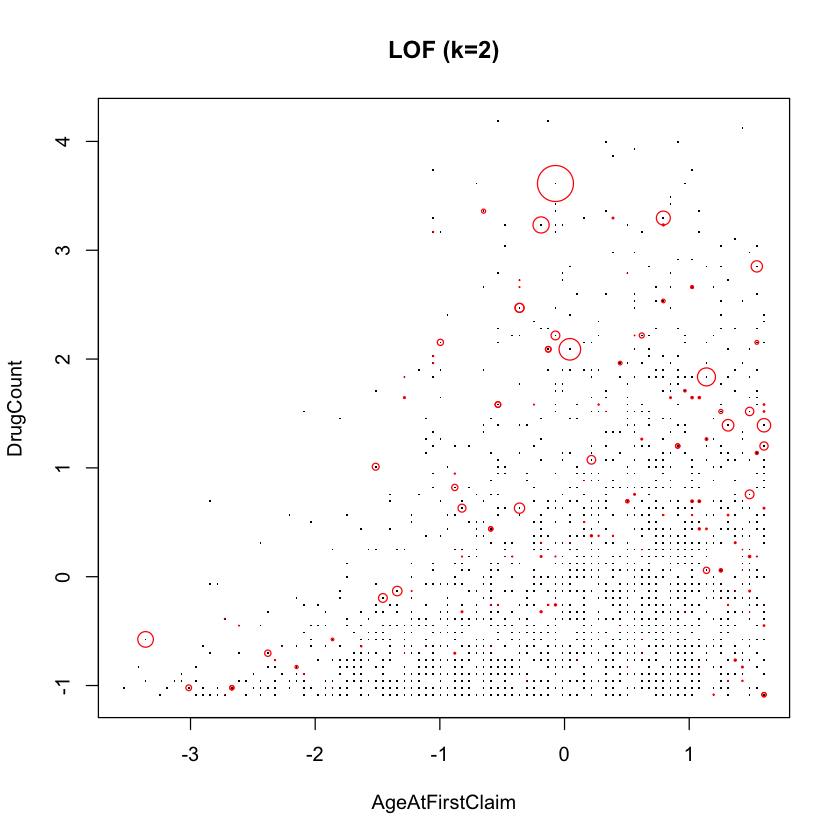

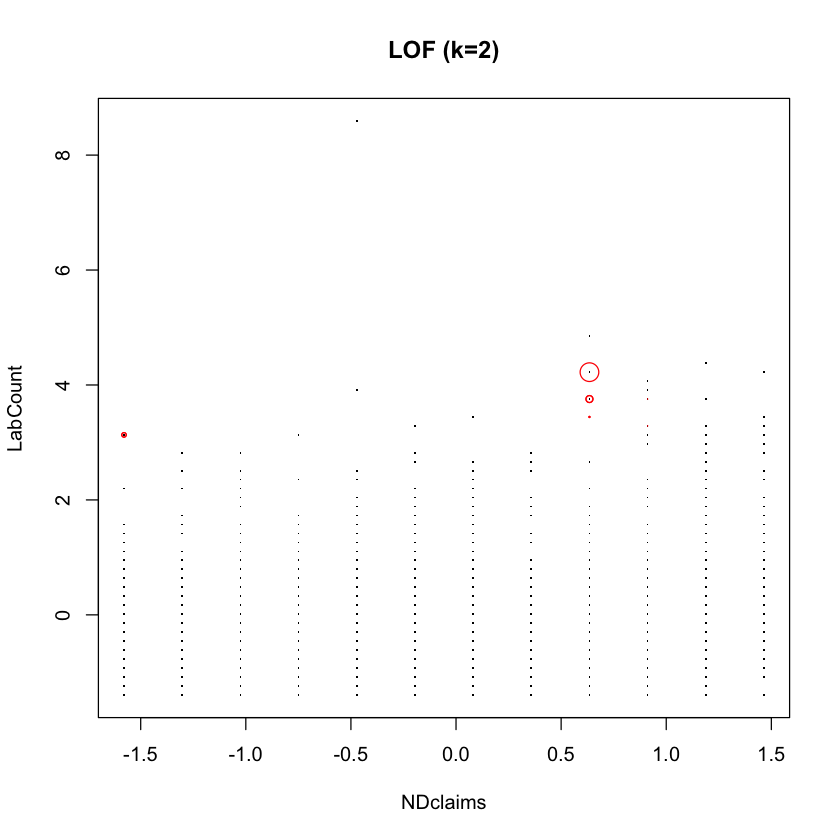

In [123]:
library(dbscan)
lof_arth <- lof(arthset_scaled, k = 2)
# lof
plot(arthset_scaled, pch = ".", main = "LOF (k=2)")
points(arthset_scaled, cex = (lof_arth-1)*2, pch = 1, col="red")

lof_lab <- lof(labset_scaled, k = 2)
# lof
plot(labset_scaled, pch = ".", main = "LOF (k=2)")
points(labset_scaled, cex = (lof_lab-1)*2, pch = 1, col="red")

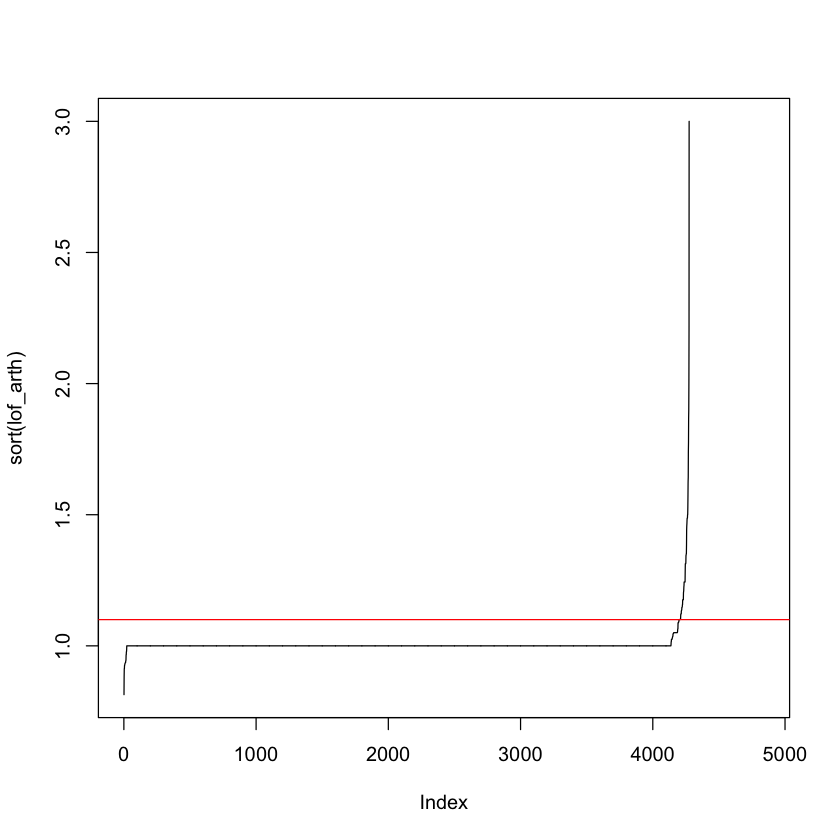

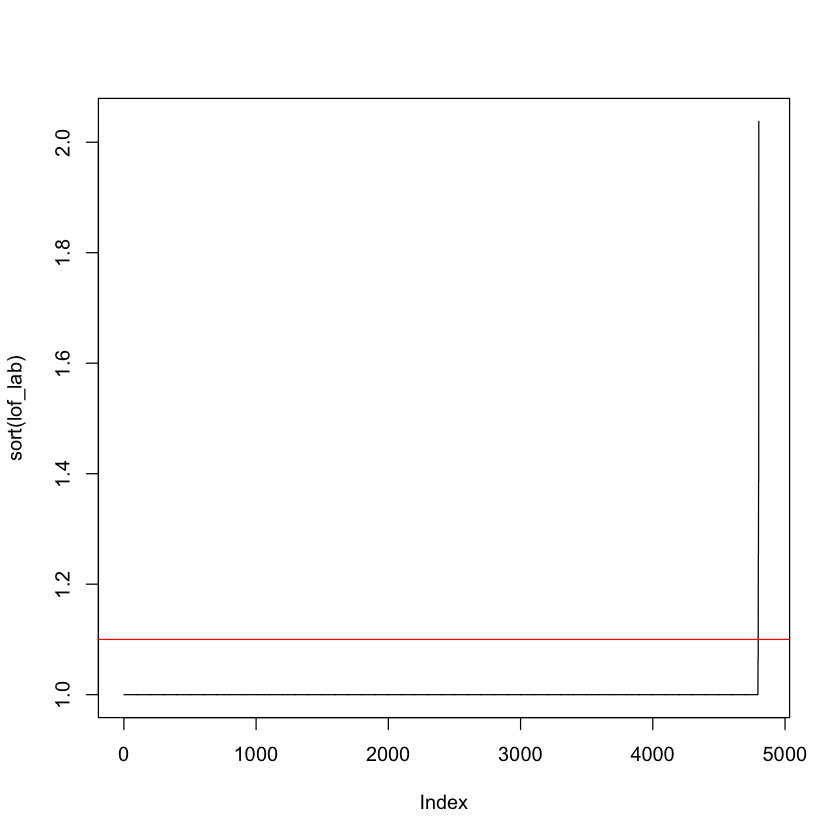

In [124]:
plot(sort(lof_arth), type = "l")
abline(h = 1.1, col = "red")

plot(sort(lof_lab), type = "l")
abline(h = 1.1, col = "red")

In [150]:
plot(data.frame(apply(arthset_scaled[lof_arth < 1.1,],2,jitter)), main = "Data and outliers")
points(arthset_scaled[lof_arth >= 1.1,], col = "grey", pch = 4)
arthset_scaled <- arthset_scaled[lof_arth < 1.1,]

# nrow(arthset_scaled)

plot(data.frame(apply(labset_scaled[lof_lab < 1.1,],2,jitter)), main = "Data and outliers")
points(labset_scaled[lof_lab >= 1.1,], col = "grey", pch = 4)
labset_scaled <- labset_scaled[lof_lab < 1.1,]
# nrow(labset_scaled)

ERROR: Error in arthset_scaled[lof_arth < 1.1, ]: incorrect number of dimensions


### 1.3 Determining distance measurement for clustering

In [85]:
d <- dist(arthset_scaled, method="euclidean")
d_lab <- dist(labset_scaled, method="euclidean")

### 1.4 Determine optimal number of clusters

In [40]:
library(factoextra)
library(NbClust)
library(ggplot2)

arthset_opt <- arthset_scaled[sample(nrow(arthset_scaled), 2000), ]
# Elbow method
fviz_nbclust(arthset_opt, hcut, method = "wss") +
    geom_vline(xintercept = 5, linetype = 2)+
  labs(subtitle = "Elbow method")
# Silhouette method
fviz_nbclust(arthset_opt, hcut, method = "silhouette")+
  labs(subtitle = "Silhouette method")
# Gap statistic
# nboot = 50 to keep the function speedy. 
# recommended value: nboot= 500 for your analysis.
# Use verbose = FALSE to hide computing progression.
fviz_nbclust(arthset_opt, hcut, nstart = 25,  method = "gap_stat", nboot = 50)+
  labs(subtitle = "Gap statistic method")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


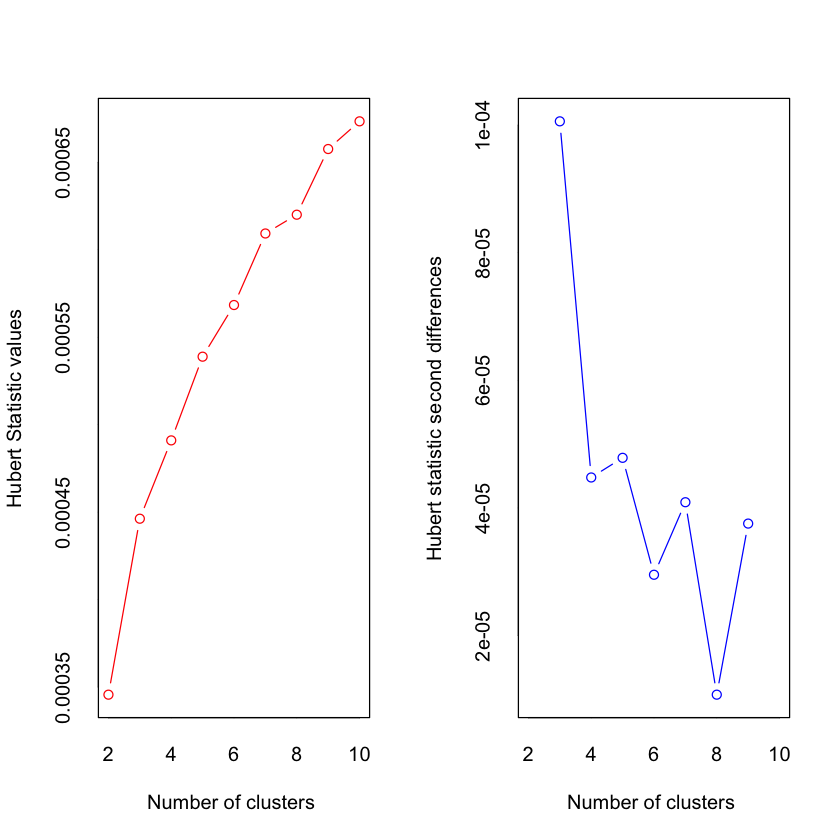

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 9 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 
* 2 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 
Among 

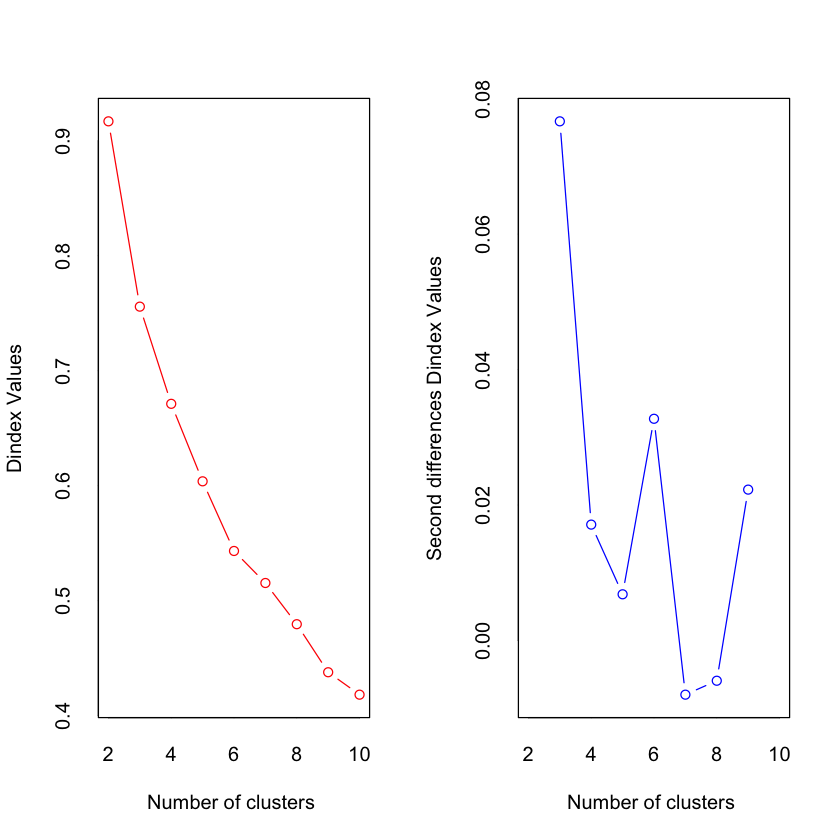

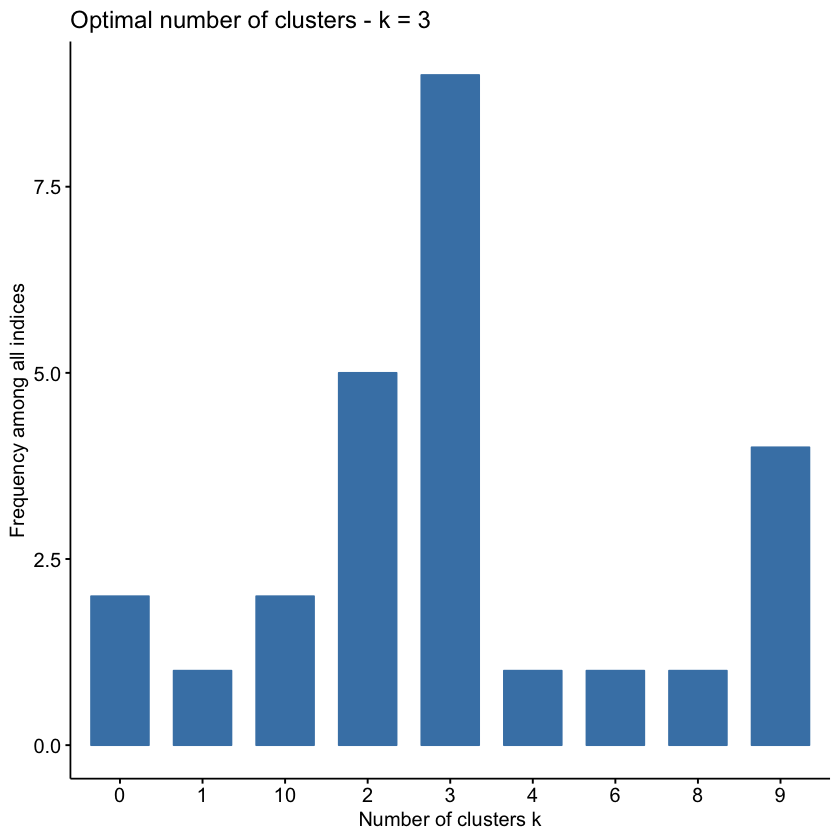

In [118]:
labset_opt <- labset_scaled[sample(nrow(labset_scaled), 2000), ]
# # Elbow method
# fviz_nbclust(labset_opt, kmeans, method = "wss") +
#     geom_vline(xintercept = 3, linetype = 2)+
#   labs(subtitle = "Elbow method")
# # Silhouette method
# fviz_nbclust(labset_opt, kmeans, method = "silhouette")+
#   labs(subtitle = "Silhouette method")
# # Gap statistic
# # nboot = 50 to keep the function speedy. 
# # recommended value: nboot= 500 for your analysis.
# # Use verbose = FALSE to hide computing progression.
# fviz_nbclust(labset_opt, kmeans, nstart = 25,  method = "gap_stat", nboot = 50)+
#   labs(subtitle = "Gap statistic method")

nb <- NbClust(labset_opt, distance = "euclidean", min.nc = 2,
        max.nc = 10, method = "kmeans")
fviz_nbclust(nb)

## 2. Clustering
### 2.1 Hierachical Clustering

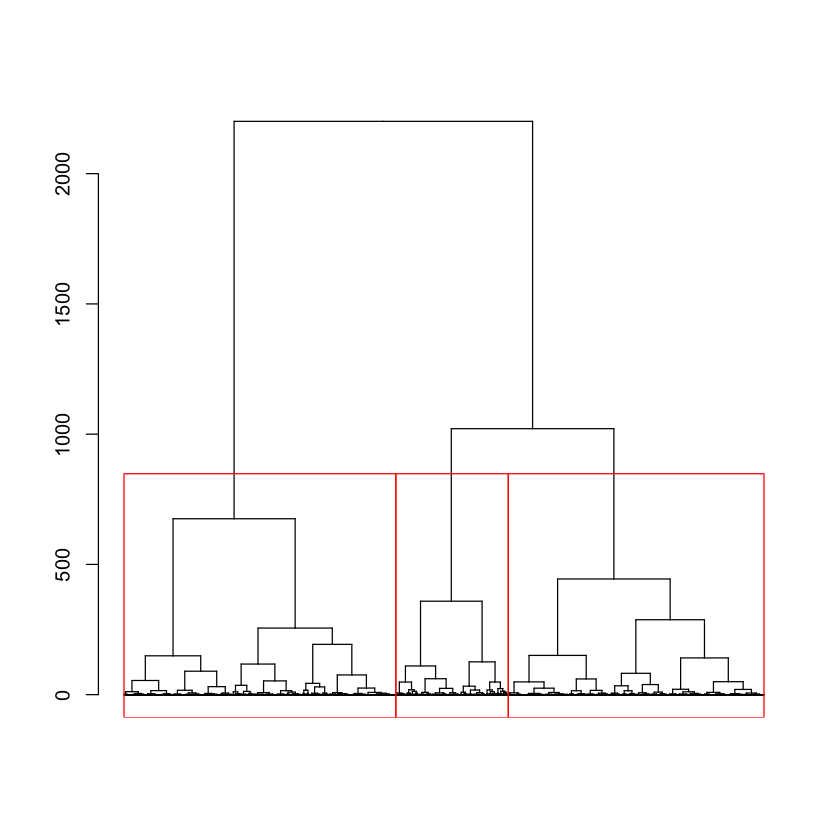

In [86]:
hc_ward <- hclust(d, method="ward.D")
# hc_ward <- hclust(d, method="complete")
plot(as.dendrogram(hc_ward), leaflab="none")
rect.hclust(hc_ward, k=3)

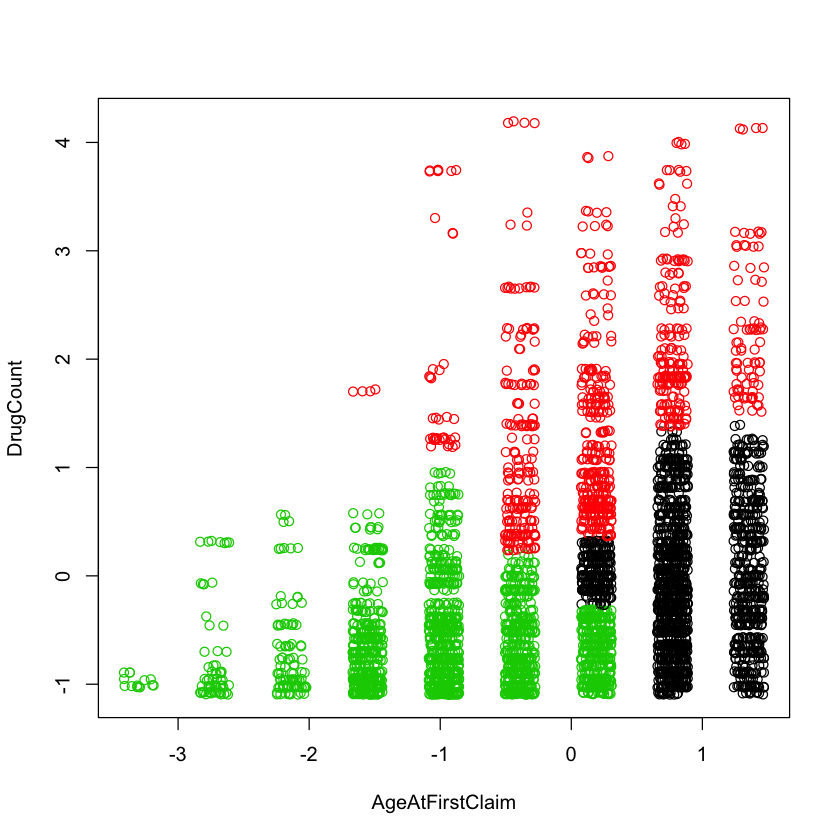

In [87]:
cluster_ward <- cutree(hc_ward, k=3)
plot(data.frame(apply(arthset_scaled,2,jitter)), col=cluster_ward)

### 2.2 DBSCAN Clustering

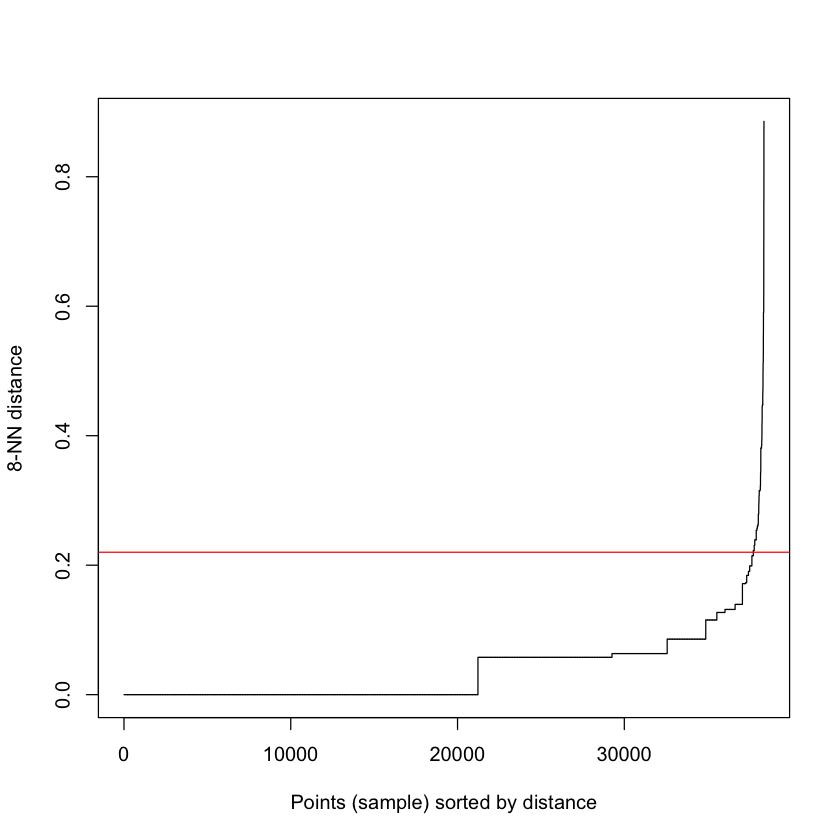

In [160]:
library(dbscan)
kNNdistplot(arthset_scaled, k = 8)
abline(h=.22, col="red")

dbscan Pts=4797 MinPts=5 eps=0.22
        0    1  2 3  4  5  6 7  8 9 10 11 12
border 44    9  0 0  7  6  0 0  0 1  0  0  1
seed    0 4592 33 6 16 15 12 8 23 6  7  6  5
total  44 4601 33 6 23 21 12 8 23 7  7  6  6

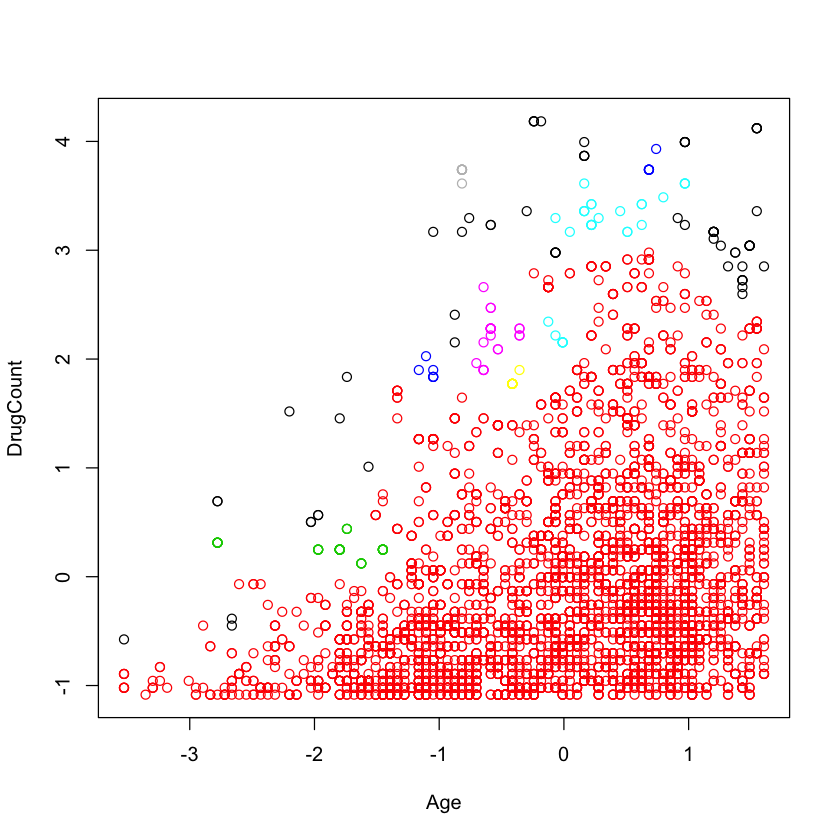

In [161]:
db <- dbscan(arthset_scaled, eps=.22)
db
# str(db)
plot(arthset_scaled, col=db$cluster+1L)

### 2.3 Gaussian Mixture Models

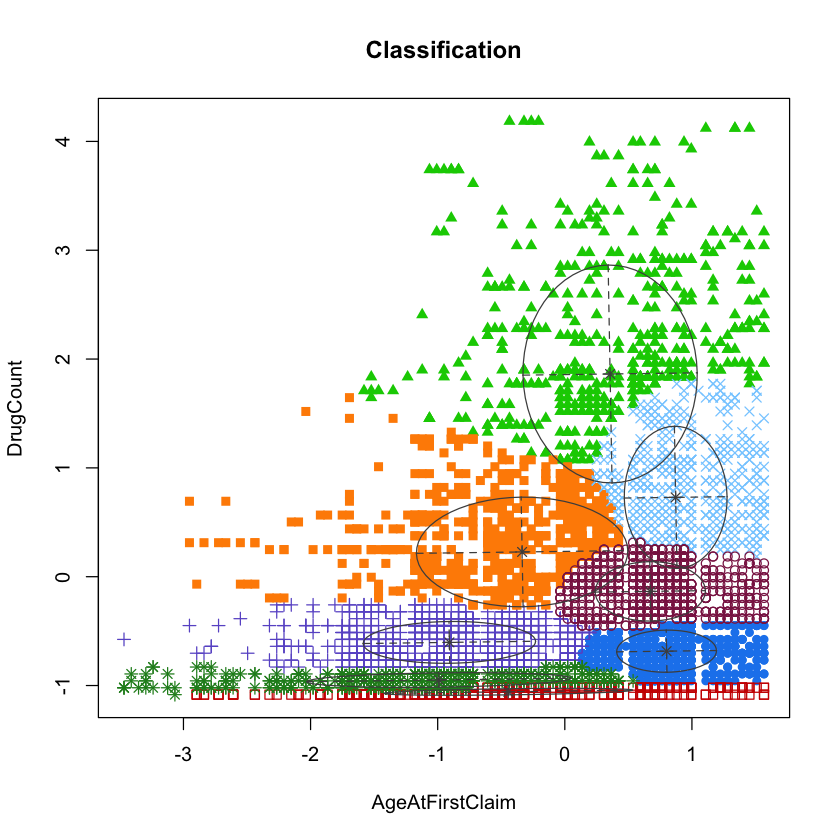

In [95]:
library(mclust)

for(i in 1:nrow(arth)){
  if(arth$AgeAtFirstClaim[i]==0){arth$AgeAtFirstClaim[i]<-sample(0:9, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==10){arth$AgeAtFirstClaim[i]<-sample(10:19, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==20){arth$AgeAtFirstClaim[i]<-sample(20:29, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==30){arth$AgeAtFirstClaim[i]<-sample(30:39, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==40){arth$AgeAtFirstClaim[i]<-sample(40:49, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==50){arth$AgeAtFirstClaim[i]<-sample(50:59, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==60){arth$AgeAtFirstClaim[i]<-sample(60:69, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==70){arth$AgeAtFirstClaim[i]<-sample(70:79, 1, replace = TRUE)}
  else if(arth$AgeAtFirstClaim[i]==80){arth$AgeAtFirstClaim[i]<-sample(80:89, 1, replace = TRUE)}
}
arth_scaled <- scale(arth)
m <- Mclust(arth_scaled)
plot(m, what = "classification")

### 2.4 K-Means Clustering (Number of drug claims&LabCount)

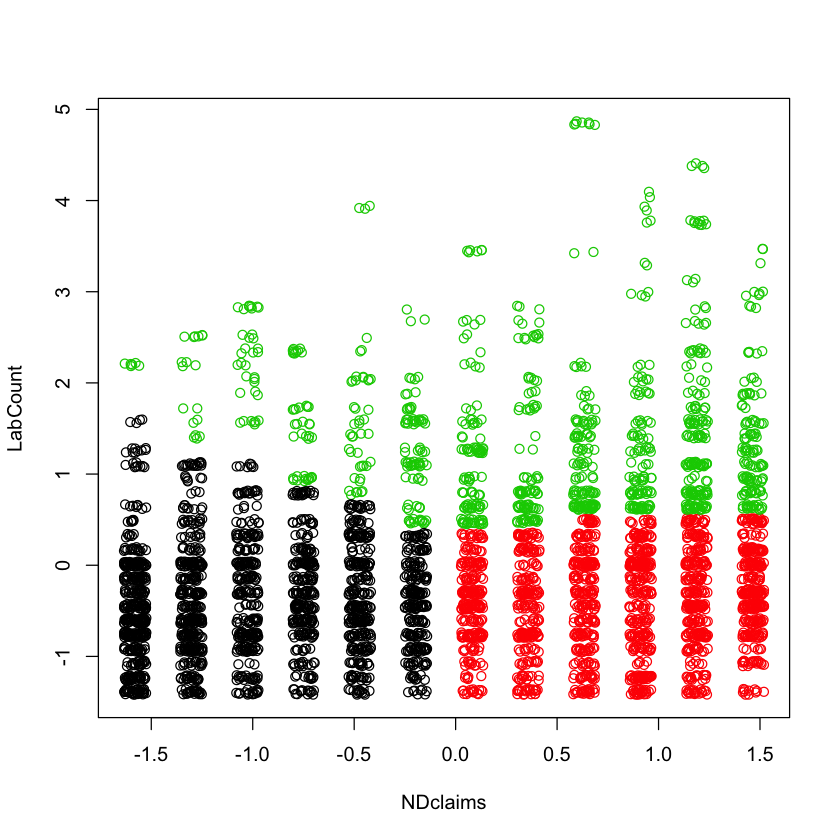

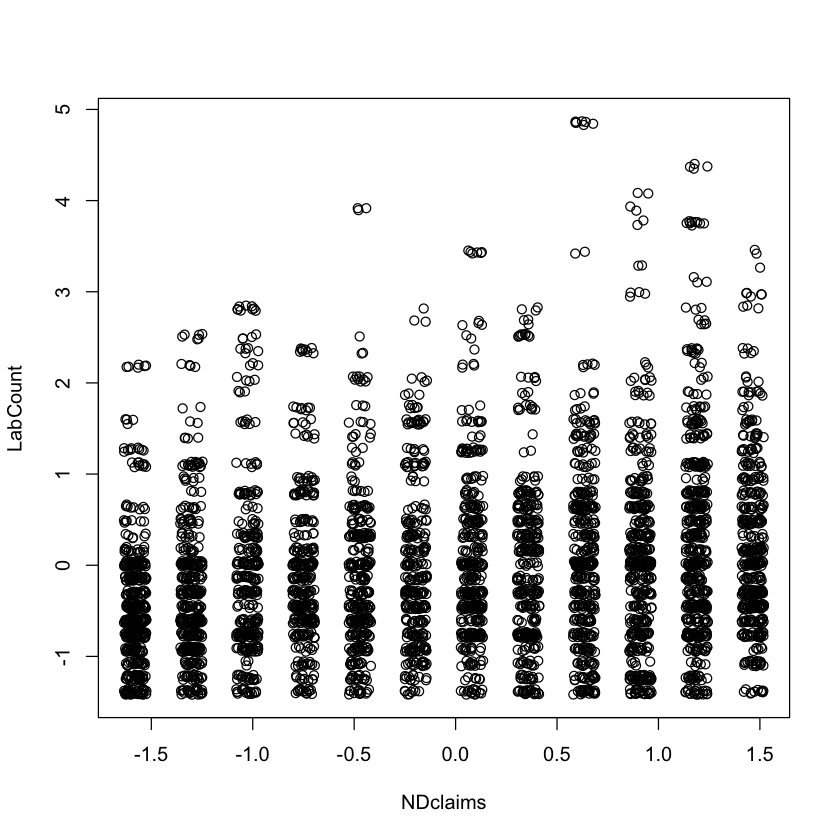

In [115]:
km <- kmeans(labset_scaled, centers=3, nstart=10) # method = "euclidean"
plot(data.frame(apply(labset_scaled,2,jitter)), col=km$cluster)
plot(data.frame(apply(labset_scaled,2,jitter)))

## 3. Internal Validation & Comparision

### 3.1 Internal Validation on Gaussian Mixture Model

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVE (ellipsoidal, equal orientation) model with 8 components: 

 log.likelihood    n df       BIC      ICL
      -11441.47 4841 40 -23222.33 -26693.4

Clustering table:
  1   2   3   4   5   6   7   8 
571 393 479 776 681 591 864 486 

Mixing probabilities:
        1         2         3         4         5         6         7         8 
0.1024034 0.0663177 0.1172376 0.1543824 0.1792299 0.1288667 0.1461415 0.1054209 

Means:
                      [,1]       [,2]      [,3]       [,4]       [,5]      [,6]
AgeAtFirstClaim  0.8004912 -0.4447617 0.3562274 -0.9080693 -0.3358728 0.8721576
DrugCount       -0.6843655 -1.0573894 1.8628365 -0.6035388  0.2274368 0.7291157
                      [,7]       [,8]
AgeAtFirstClaim  0.6722959 -0.9912132
DrugCount       -0.1347239 -0.9490251

Variances:
[,,1]
                AgeAtFirstClai

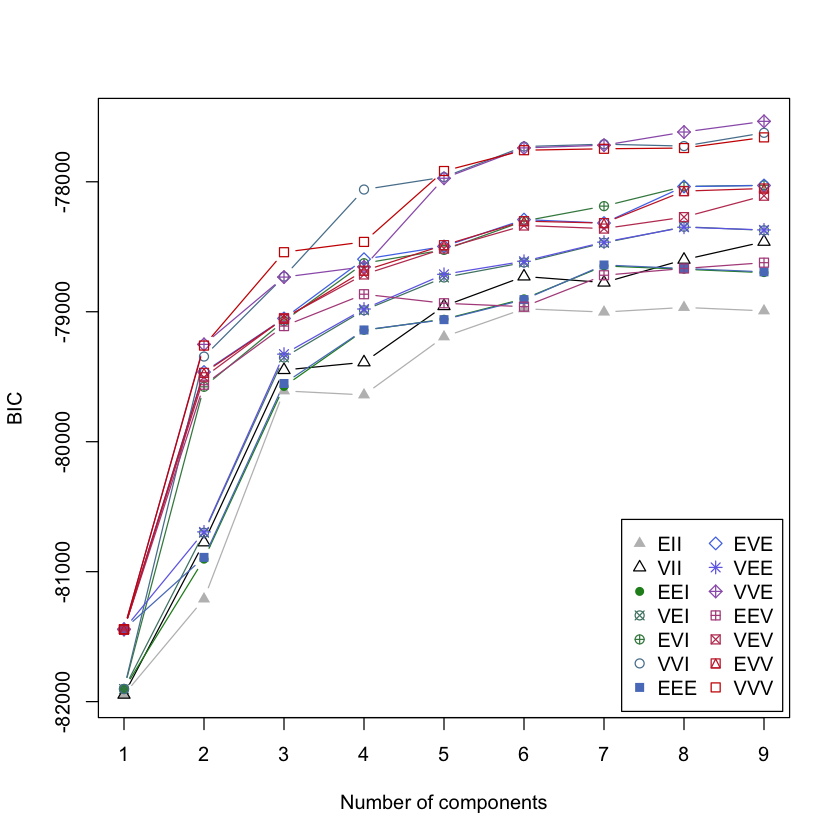

In [96]:
# total&between
library(fpc)
#Gaussian Mixture Model
# summary(m)
summary(m, parameters = TRUE)

BIC <- mclustBIC(arth)
plot(BIC)

BIC:https://en.wikipedia.org/wiki/Bayesian_information_criterion

In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred.

In [97]:
cluster.stats(dist(arth),m$classification) 

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.list(obj)
9. repr_list_generic(obj, "markdown", "%s. %s\n", "$%s\n:   %s\n", 
 .     "**$%s** = %s", "%s\n\n", numeric_item = "[[%s]]\n:   %s\n", 
 .     item_uses_numbers = TRUE, escape_fun = html_escape)
10. lapply(vec, format2repr[[fmt]])
11. FUN(X[[i]], ...)
12. repr_markdown.nume

0.00000,1,25.01999,1.00000,7.81025,10.00000,1.00000,1.00000
1.00000,0,33.00000,3.00000,12.00000,19.00000,9.00000,1.00000
25.01999,33,0.00000,22.09072,1.00000,1.00000,13.15295,30.00000
1.00000,3,22.09072,0.00000,1.00000,15.23155,1.00000,1.00000
7.81025,12,1.00000,1.00000,0.00000,1.00000,1.00000,9.00000
10.00000,19,1.00000,15.23155,1.00000,0.00000,1.00000,19.64688
1.00000,9,13.15295,1.00000,1.00000,1.00000,0.00000,6.00000
1.00000,1,30.00000,1.00000,9.00000,19.64688,6.00000,0.00000
0.00000,23.97227,48.81391,31.00647,30.90401,25.81300,12.90418,35.29977
23.97227,0.00000,56.95502,21.19948,30.06784,40.65385,27.54758,22.45566
48.81391,56.95502,0.00000,51.64589,36.43584,28.23921,39.98664,59.14245


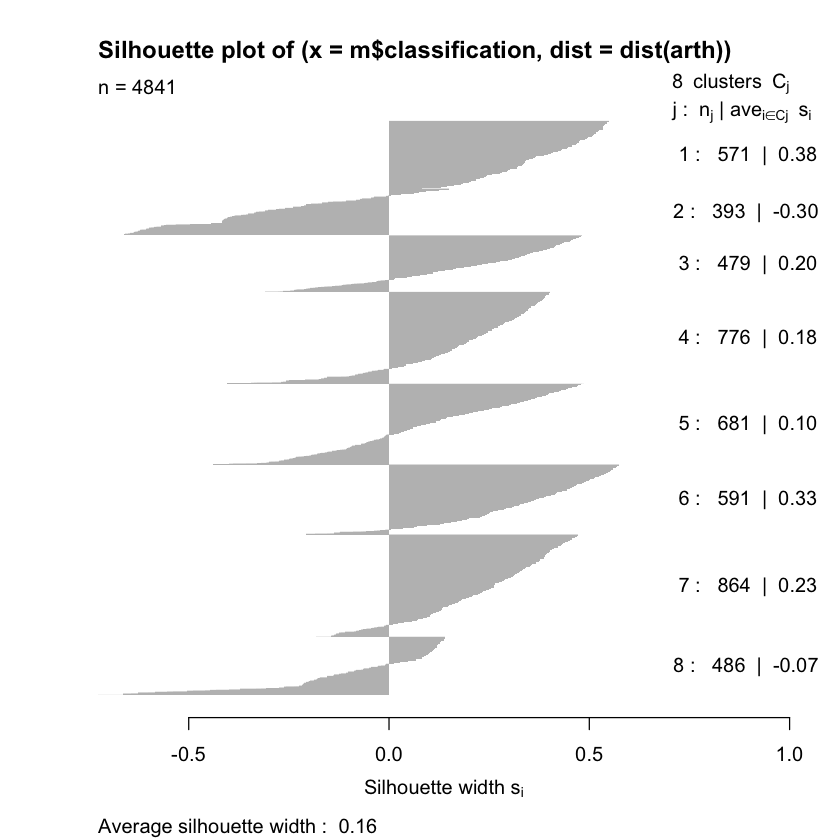

In [98]:
library(cluster)
plot(silhouette(m$classification, dist(arth)))

### 3.2 Internal Validation on Hierarchical Clustering

In [100]:
#Hierarchical
cluster.stats(d,cluster_ward) 

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.list(obj)
9. repr_list_generic(obj, "markdown", "%s. %s\n", "$%s\n:   %s\n", 
 .     "**$%s** = %s", "%s\n\n", numeric_item = "[[%s]]\n:   %s\n", 
 .     item_uses_numbers = TRUE, escape_fun = html_escape)
10. lapply(vec, format2repr[[fmt]])
11. FUN(X[[i]], ...)
12. repr_markdown.nume

0.00000000,0.06347523,0.06347523
0.06347523,0.00000000,0.06347523
0.06347523,0.06347523,0.00000000
0.000000,1.965826,1.957469
1.965826,0.000000,2.604798
1.957469,2.604798,0.000000


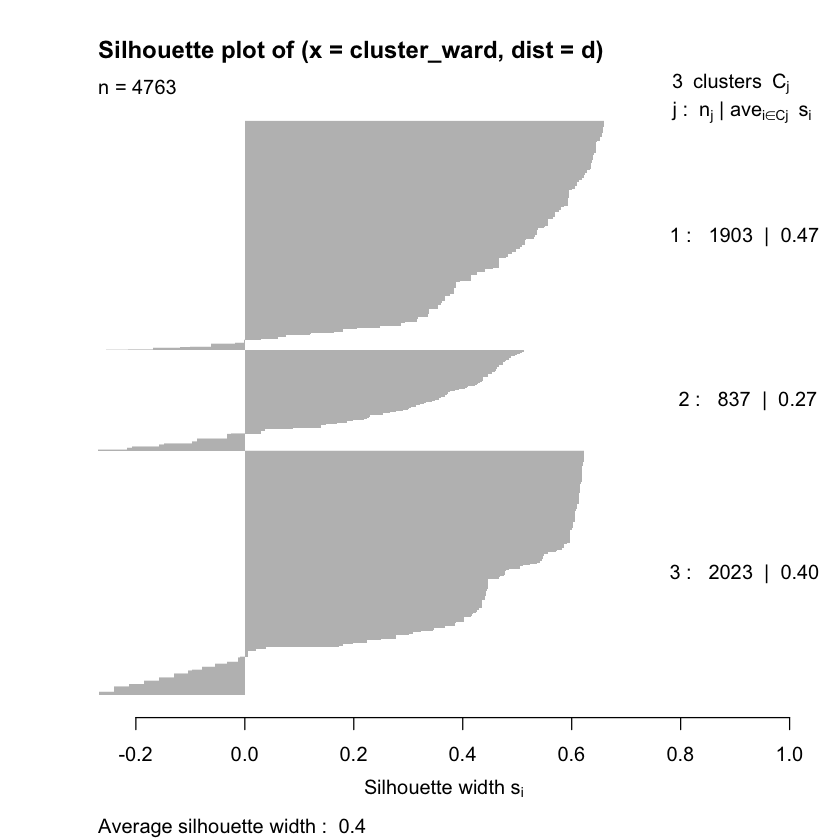

In [101]:
plot(silhouette(cluster_ward, d))

### 3.3 Internal Validation on K-means

In [181]:
#K-means
km

K-means clustering with 5 clusters of sizes 428, 1144, 1136, 883, 1206

Cluster means:
    NDclaims   LabCount
1  0.3450281  2.1269559
2  0.7629636 -0.7215967
3  0.8764286  0.4487704
4 -0.8864315  0.2901235
5 -1.0236214 -0.7941523

Clustering vector:
   [1] 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3 3 4 4 3 2 2 3 3 3 3 3 4 4 1 1 1 1
  [38] 5 5 5 4 3 5 5 5 5 5 4 4 4 4 4 4 4 2 1 1 1 1 1 1 1 1 1 2 2 3 3 3 3 3 5 5 3
  [75] 5 2 2 5 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 1 1 1 5 5 5 5 5
 [112] 5 2 2 2 2 5 5 5 5 5 3 3 4 4 4 3 3 3 3 3 3 3 3 2 2 1 5 5 5 2 4 4 3 3 3 1 5
 [149] 5 4 2 4 4 4 4 4 4 3 4 4 4 4 4 3 3 3 3 3 3 4 2 2 2 2 4 4 5 5 2 2 2 2 4 4 4
 [186] 4 3 4 3 3 2 4 4 4 4 5 5 5 4 4 1 1 5 3 3 3 4 4 4 4 4 4 5 5 1 1 1 1 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 4 4 1 3 2 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 4 4
 [260] 4 2 2 2 5 5 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 5 5 5 4 4 4 2 4 4 4
 [297] 5 4 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 4 5 3 3 3 3 2 2 5 5 3 3 5 3 3 2 5 5
 [334] 5 2 2 4 4 1 2

In [102]:
cluster.stats(d_lab, km$cluster)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.list(obj)
9. repr_list_generic(obj, "markdown", "%s. %s\n", "$%s\n:   %s\n", 
 .     "**$%s** = %s", "%s\n\n", numeric_item = "[[%s]]\n:   %s\n", 
 .     item_uses_numbers = TRUE, escape_fun = html_escape)
10. lapply(vec, format2repr[[fmt]])
11. FUN(X[[i]], ...)
12. repr_markdown.nume

0.0000000,0.2767756,0.1558799
0.2767756,0.0000000,0.1558799
0.1558799,0.1558799,0.0000000
0.000000,1.98304,2.041362
1.983040,0.00000,2.535800
2.041362,2.53580,0.000000


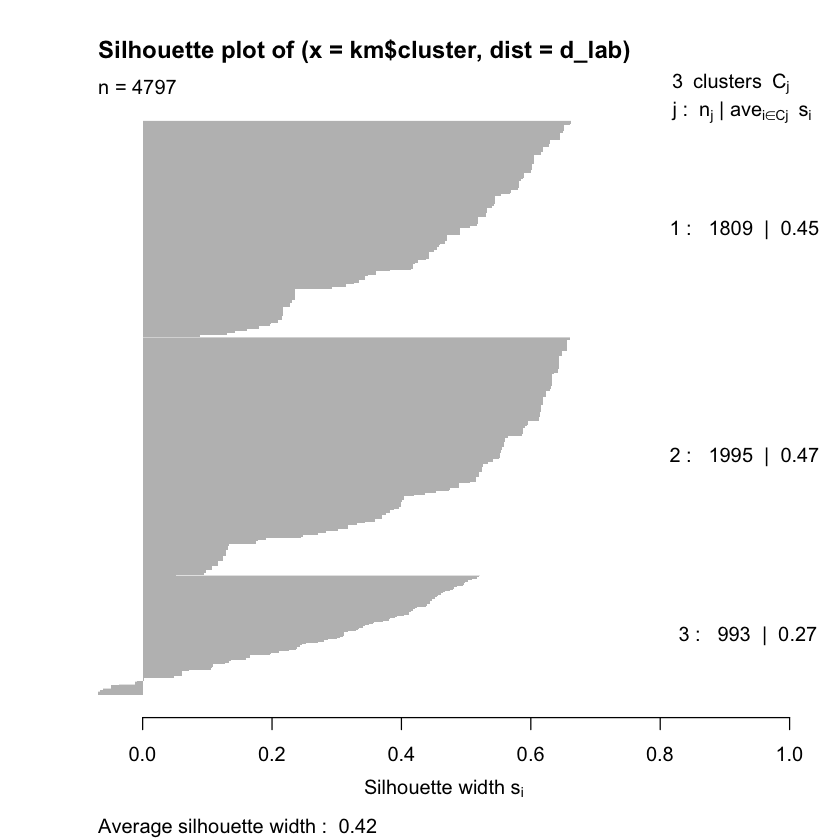

In [103]:
plot(silhouette(km$cluster, d_lab))

### Dunn Index

[1] 15

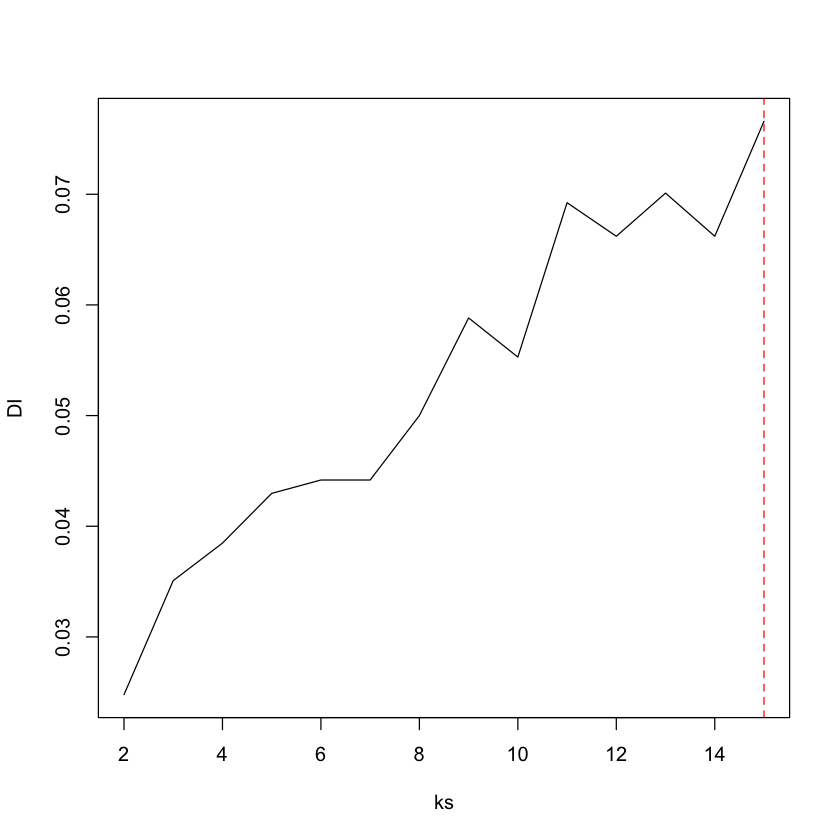

In [112]:
ks <- 2:15
DI <- sapply(ks, FUN=function(k) {
  cluster.stats(d_lab, kmeans(labset_scaled, centers=k, nstart=5)$cluster)$dunn
})
plot(ks, DI, type="l")
ks[which.max(DI)]
abline(v=ks[which.max(DI)], col="red", lty=2)

## External Validation

In [198]:
amiY1 <- claims[claims$Year == "Y1",]
amiset <- amiY1[which(amiY1$PrimaryConditionGroup=="AMI"),]
# summary(amiset)
summary(arthset)

     MemberID     LengthOfStay     CharlsonIndex AgeAtFirstClaim Sex     
 39116641:  26   Min.   :0.00000   Min.   :0     Min.   : 0.00    :1321  
 76550927:  15   1st Qu.:0.00000   1st Qu.:0     1st Qu.:48.00   F:1644  
 49766383:  14   Median :0.00000   Median :0     Median :65.00   M:1235  
 89999560:  14   Mean   :0.05929   Mean   :0     Mean   :61.25           
 2475559 :  13   3rd Qu.:0.00000   3rd Qu.:0     3rd Qu.:74.00           
 2816931 :  13   Max.   :3.00000   Max.   :0     Max.   :89.00           
 (Other) :4105                                                           
     claims         dclaims         DrugCount        LabCount     
 Min.   : 1.00   Min.   : 1.000   Min.   : 1.00   Min.   : 1.000  
 1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.: 6.00   1st Qu.: 5.000  
 Median : 4.00   Median : 7.000   Median :13.00   Median : 9.000  
 Mean   : 4.55   Mean   : 6.589   Mean   :17.42   Mean   : 9.845  
 3rd Qu.: 6.00   3rd Qu.:10.000   3rd Qu.:24.00   3rd Qu.:13.000  
 Max. 

In [188]:
interid <- intersect(arthset$MemberID, amiset$MemberID)
summary(interid)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  960842 29270034 53163258 51579536 74586779 99840383 

### Hierarchical

In [189]:
exset <- data.frame(AgeAtFirstClaim = arthset$AgeAtFirstClaim, DrugCount = arthset$DrugCount)
exset <- scale(exset)
exd <- dist(exset)
hc_ex <- hclust(exd, method="ward.D")
cluster_ex <- cutree(hc_ex, k=3)
arthset$cluster <-cluster_ex
summary(arthset)

     MemberID     LengthOfStay     CharlsonIndex AgeAtFirstClaim Sex     
 39116641:  26   Min.   :0.00000   Min.   :0     Min.   : 0.00    :1321  
 76550927:  15   1st Qu.:0.00000   1st Qu.:0     1st Qu.:48.00   F:1644  
 49766383:  14   Median :0.00000   Median :0     Median :65.00   M:1235  
 89999560:  14   Mean   :0.05929   Mean   :0     Mean   :61.25           
 2475559 :  13   3rd Qu.:0.00000   3rd Qu.:0     3rd Qu.:74.00           
 2816931 :  13   Max.   :3.00000   Max.   :0     Max.   :89.00           
 (Other) :4105                                                           
     claims         dclaims         DrugCount        LabCount     
 Min.   : 1.00   Min.   : 1.000   Min.   : 1.00   Min.   : 1.000  
 1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.: 6.00   1st Qu.: 5.000  
 Median : 4.00   Median : 7.000   Median :13.00   Median : 9.000  
 Mean   : 4.55   Mean   : 6.589   Mean   :17.42   Mean   : 9.845  
 3rd Qu.: 6.00   3rd Qu.:10.000   3rd Qu.:24.00   3rd Qu.:13.000  
 Max. 

In [191]:
out <- arthset[arthset$MemberID %in% interid, ]
out <- data.frame(MemberID = out$MemberID,AgeAtFirstClaim = out$AgeAtFirstClaim, Cluster = out$cluster)
out$Cluster <-as.factor(out$Cluster)
out$MemberID <-as.factor(out$MemberID)
summary(out)
# out
old <- out[which(out$AgeAtFirstClaim>=60&out$Cluster==1),]
summary(old)

     MemberID    AgeAtFirstClaim Cluster
 49766383:  14   Min.   :26.00   1:695  
 2475559 :  13   1st Qu.:61.00   2:319  
 2816931 :  13   Median :69.00   3:136  
 70898819:  12   Mean   :67.67          
 2706742 :  11   3rd Qu.:76.00          
 19534551:  11   Max.   :89.00          
 (Other) :1076                          

     MemberID   AgeAtFirstClaim Cluster
 49766383: 14   Min.   :60.00   1:610  
 2475559 : 13   1st Qu.:65.00   2:  0  
 2816931 : 13   Median :71.00   3:  0  
 70898819: 12   Mean   :71.95          
 2706742 : 11   3rd Qu.:78.00          
 26415565: 11   Max.   :89.00          
 (Other) :536                          

### K-means

     MemberID    AgeAtFirstClaim Cluster
 49766383:  14   Min.   :26.00   1:325  
 2475559 :  13   1st Qu.:61.00   2:226  
 2816931 :  13   Median :69.00   3:599  
 70898819:  12   Mean   :67.67          
 2706742 :  11   3rd Qu.:76.00          
 19534551:  11   Max.   :89.00          
 (Other) :1076                          

     MemberID   AgeAtFirstClaim Cluster
 49766383: 14   Min.   :60.00   1:229  
 2475559 : 13   1st Qu.:66.00   2:176  
 2816931 : 13   Median :73.00   3:520  
 70898819: 12   Mean   :72.32          
 2706742 : 11   3rd Qu.:78.00          
 26415565: 11   Max.   :89.00          
 (Other) :851                          

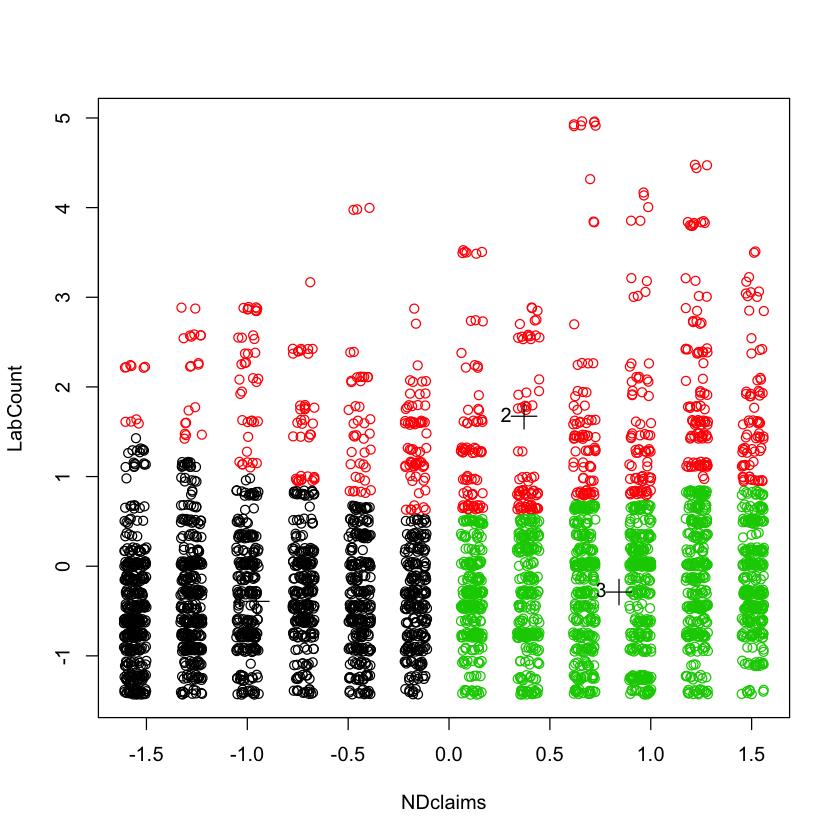

In [197]:
exset <- data.frame(NDclaims = arthset$dclaims, LabCount = arthset$LabCount)
exset <- scale(exset)
exd <- dist(exset)
kmex <- kmeans(exset, centers=3, nstart=10) # method = "euclidean"
plot(data.frame(apply(exset,2,jitter)), col=kmex$cluster)
points(kmex$centers, pch=3, cex=2) # this adds the centroids
text(kmex$centers, labels=1:4, pos=2)
arthset$cluster <-kmex$cluster
# summary(arthset)
out <- arthset[arthset$MemberID %in% interid, ]
out <- data.frame(MemberID = out$MemberID,AgeAtFirstClaim = out$AgeAtFirstClaim, Cluster = out$cluster)
out$Cluster <-as.factor(out$Cluster)
out$MemberID <-as.factor(out$MemberID)
summary(out)
# out
old <- out[which(out$AgeAtFirstClaim>=60),]
summary(old)

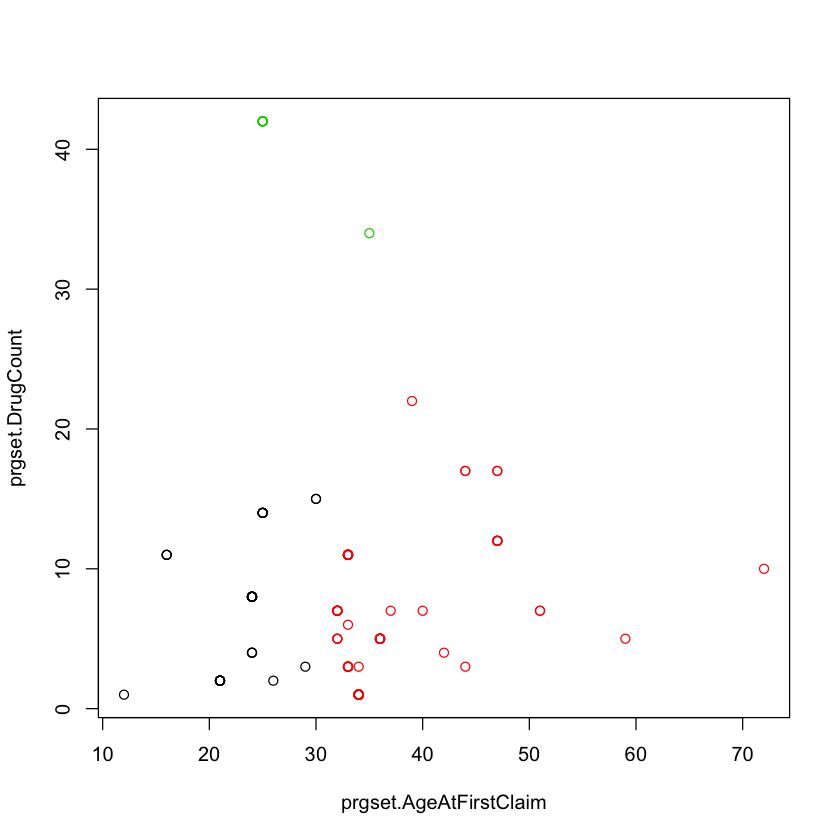

In [185]:
prgY1 <- claims[claims$Year == "Y1",]
prgY1 <- prgY1[which(prgY1$PrimaryConditionGroup=="PRGNCY"),]
prgset <- merge(prgY1, membersY1, by = "MemberID")
prgset <- data.frame(prgset$AgeAtFirstClaim, prgset$DrugCount)
# prgset <- scale(prgset)
prgd <- dist(prgset)
hc_prg <- hclust(prgd, method="ward.D")
cluster_prg <- cutree(hc_prg, k=3)
plot(prgset, col=cluster_prg)